![delensalot logo](./../../res/dlensalot2.png)

# Interactive minimal working example - quickstart
In this notebook, you will use delensalots most convenient function,
 * `anafast()`: calculates the delensed power spectrum from the input data
 * `map2tempblm()`: calculates the $B$-mode lensing template from the input data
 * `map2delmap()`: calculates the delensed map from the input data


These functions use a faithful configuration to delens your data. It will likely not be optimal, but is a great start if you just want to get some results

## Generate observed maps
You will need some toydata, in particular observed data, so here you go, observed polarization maps with a CMB-S4 like configuration. It also generates a lensed $B$-mode map `bsky`, which you will later use to delens.

In [1]:
from IPython.display import clear_output
from datetime import datetime
import os
from os.path import join as opj

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

import delensalot
from delensalot.run import run
from delensalot.utility.utils_hp import Alm, almxfl, alm_copy, gauss_beam
from delensalot.config.metamodel.dlensalot_mm import DLENSALOT_Model, DLENSALOT_Analysis

delensalot_model = DLENSALOT_Model(
    defaults_to = 'default_CMBS4_fullsky_polarization',
    analysis = DLENSALOT_Analysis(key='p_p', TEMP_suffix='my_first_delensalot_analysis_quickstart_toydata'))
delensalot_runner = run(config_fn='', job_id='generate_sim', config_model=delensalot_model, verbose=True)
delensalot_runner.run()
ana_mwe = delensalot_runner.init_job()
bsky = ana_mwe.simulationdata.get_sim_sky(simidx=0, field='polarization', space='alm', spin=0)[1]
obs = ana_mwe.simulationdata.get_sim_obs(simidx=0, field='polarization', space='alm', spin=0)
obs_map = ana_mwe.simulationdata.get_sim_obs(simidx=0, field='polarization', space='map', spin=2)



del ana_mwe
del delensalot_runner
clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))


Cell finished 12:40:03


# `map2tempblm()`
calculates the $B$-mode lensing template from the input data

In [ ]:
blt = delensalot.map2tempblm(obs_map, lmax_cmb=delensalot_model.analysis.lm_max_ivf[0], beam=delensalot_model.analysis.beam, itmax=delensalot_model.itrec.itmax, nlev=delensalot_model.noisemodel.nlev, use_approximateWF=True, verbose=True, )

clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))

In [ ]:
input = alm_copy(bsky, None, hp.Alm.getlmax(blt.shape[0]), hp.Alm.getlmax(blt.shape[0]))
output = hp.alm2cl(input-blt)

Alens = np.mean(output[30:200]/hp.alm2cl(input)[30:200])
print('Delensed simulated lensing B-map: {:.3f}'.format(Alens))

input = alm_copy(obs[1], None, hp.Alm.getlmax(blt.shape[0]), hp.Alm.getlmax(blt.shape[0]))
output = hp.alm2cl(input-blt)
Reslens = np.mean(output[30:200]/hp.alm2cl(input)[30:200])
print('Delensed observed B-map: {:.3f}'.format(Reslens))

Delensing simulated lensing B-map 0.178
Delensing observed B-map 0.210


# `anafast()`

In [ ]:
delcl = delensalot.anafast(obs_map, lmax_cmb=delensalot_model.analysis.lm_max_ivf[0], beam=delensalot_model.analysis.beam, itmax=delensalot_model.itrec.itmax, nlev=delensalot_model.noisemodel.nlev, use_approximateWF=True, verbose=True, )

clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))

plt.plot(delcl)
plt.xlim(1,220)

# `map2delblm()`

Cell finished 01:50:54


(1.0, 220.0)

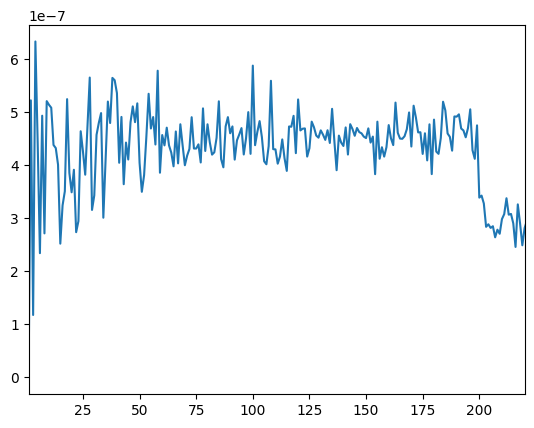

In [7]:
delblm = delensalot.map2delblm(obs_map, lmax_cmb=delensalot_model.analysis.lm_max_ivf[0], beam=delensalot_model.analysis.beam, itmax=delensalot_model.itrec.itmax, nlev=delensalot_model.noisemodel.nlev, use_approximateWF=True, defaults_to='P_FS_CMBS4', verbose=True, )

clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))

plt.plot(hp.alm2cl(delblm))
plt.xlim(1,220)

This concludes the tutorial.

# Summary and next steps
This tutorial demonstrated how to generate delensed maps in a quick way and without knowing much about delensalot.

Check out the other tutorials, or see the [documentation](link_to_rtd_doc), or [github](https://github.com/NextGenCMB/delensalot).